<span style="font-size:30px; font-weight:bold;">Comparing the relationship between private and public school quality measures on house price growth, and to what extent are these measures capitalized into house prices across California counties from 2010 to 2017.</span>

<span style="font-size:24px; font-weight:bold;">Project 1</span>

**Introduction**

This project seeks to compare the relationship between public and private school quality measures on house price growth, and to what extent are these measures capitalized into house prices across California counties from 2010 to 2017. House prices are typically influenced by local school quality measures but there's been debate around which measures are good proxies for school quality. Oates (1969) found expenditure per pupil to be proficient, while Rosen and Fullerton (1977) and Downes and Zabel (2002) did not, but both found test scores to be significant. Gibbons and Machin (2003) find higher proportion of students hitting education targets to be signficant, while Figlio and Lucas (2004) find that letter grades assigned to elementary schools to be insignificant. Disentangling the effect between neighbourhood characteristics and school quality measures is a difficult problem in all of these papers, but Jud and Watts (1981) controlled for racial demographics and saw reading scores have a positive effect, Black (1999) and Kane, Steiger, and Reigg (2005) examined that test scores also have a positive effect when controlling for boundary line fixed effects. Bayer, Ferreira, and McMillan (2007) advance Black's method by controlling for sociodemographics along the border, and see that the coefficient on school qaulity decreases from the one Black obtained, but still significant. The value-added method was regarded as one of the most theoretically appropriate methods tested by Hayes and Taylor (1996) using marginal school effects, but Brasington (1999) found it not to be, and test scores to be better. Further Brasington and Haurin (2006) find expenditure per pupil and test scores to increase house prices while value-added did not. This analysis examines student-to-teacher ratio more closely, a measure that is not prevalent within a lot of these papers except for Brasington (1999). Allowing for more insight into whether student-to-teacher ratio among public and private schools can be a good proxy for school quality through the extent to which it's reflected within house prices.

Data for this analysis comes from multiple sources including Kaggle U.S. Schools Dataset (Andrew, 2021), Kaggle U.S. Real Estate Dataset (Sakib, 2021), U.S. Bureau of Economic Analysis (BEA, n.d.), and the U.S. Census Bureau (n.d.). These datasets cover all California counties from 2009 to 2017, a period of economic recovery and housing market shifts after the 2008 financial crisis.

This analysis finds that public school student-to-teacher ratio to be the only statistically significant variable. However, the analysis hasn't controlled for local county policies such as property taxes, land-use regulation or education funding. A further analysis would control for these variables allowing for more a accurate analysis. Also, it finds that northern counties tend to have lower public and private school student-to-teacher ratio (especially public schools), more variation in these ratios, and slightly greater year-over-year house price growth compared to central and especially southern counties. It is almost like a gradient going from south east to north west California counties in terms of going from high to low ratios, and low to high year-over-year house price growth. Private school student-to-teacher ratio may not have as significant of an impact on yearly house price growth due to its range being much smaller than public schools. Therefore, any decrease in student-to-teacher ratio will not be as significant as it is in public schools since the scale of the decrease is almost never as large. 

**Explanation of Variables**

Student-to-teacher ratio and enrollment rate reflects the level of individualized attention students receive and the demand for a school, repsectively, which are both often associated with better percieved quality of schooling. A lower ratio suggests smaller class sizes, which can improve student engagement and academic performance. While a higher enrollment rate may be an indicator for greater demand. Grade range offered could reflect the specialization a school places on student age groups. A more narrow grade range may be correlated with higher quality due to a more focused school curriculum on that age range, which is something parents may be looking for when deciding where to live. The number of schools may be an indicator of favourable school policies, better quality of education, and economic well-being. A county with more favourable school policies will attract more individuals looking to live long-term and raise a family.  

Income per capita yearly growth captures changes in income level in each county. An increase in income per capita growth may be associated with better living standards and public services such as lower crime and more sense of community. It also controls for yearly changes in income levels. An increase in population yearly growth could be associated with better job opportunities as people migrate to areas with more job openings, and also controls for yearly changes in population levels. Land area controls for the size of counties since bigger counties will typically have more schools.

<span style="font-size:16px; font-weight:bold;">Data Cleaning/Loading</span>

In [1]:
# Import required libraries for analysis.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
import seaborn as sns

# READ DATASETS

# Read private & public school datasets
priv = pd.read_csv('Private_Schools.csv')
pub = pd.read_csv('Public_Schools.csv')

# Read real estate dataset
re = pd.read_csv('realtor-data.zip.csv')

# Read income per capita yearly percentage change dataset
incpc = pd.read_csv('/Users/capi/Downloads/california_county_incpc%change.csv', skiprows=3)

# Read population dataset
pop = pd.read_csv('/Users/capi/Downloads/california_counties_popgrowth.csv', skiprows=3)

# Read land area dataset
landarea = pd.read_csv('/Users/capi/Downloads/california_counties_landarea.csv')

# CLEAN DATASETS

# Clean private & public school datasets

# Match column names between datasets
priv.rename(columns = {'SOURCEDATE':'DATE', 'START_GRAD': 'START_GRADE', 'LEVEL_': 'LEVEL'}, inplace = True)
pub.rename(columns = {'SOURCEDATE':'DATE', 'ST_GRADE': 'START_GRADE', 'LEVEL_': 'LEVEL'}, inplace = True)

priv.dropna(subset = ['STATE', 'COUNTY', 'DATE', 'ZIP', 'LATITUDE', 'LONGITUDE', 'ENROLLMENT', 
                      'FT_TEACHER', 'START_GRADE', 'END_GRADE', 'POPULATION', 'LEVEL'], inplace = True)
pub.dropna(subset = ['STATE', 'COUNTY', 'DATE', 'ZIP', 'LATITUDE', 'LONGITUDE', 'ENROLLMENT', 
                     'FT_TEACHER', 'START_GRADE', 'END_GRADE', 'POPULATION', 'LEVEL'], inplace = True)

# Format sourcedate column in school datasets to remove unwanted characters (00:00:00)
priv['DATE'] = pd.to_datetime(priv['DATE']).dt.year
pub['DATE'] = pd.to_datetime(pub['DATE']).dt.year

priv = priv[priv['ENROLLMENT'] > 0]
priv = priv[priv['FT_TEACHER'] > 0]
pub = pub[pub['ENROLLMENT'] > 0]
pub = pub[pub['FT_TEACHER'] > 0]

priv = priv[priv['DATE'].between(2009, 2017)]
pub = pub[pub['DATE'].between(2009, 2017)]

priv['START_GRADE'] = pd.to_numeric(priv['START_GRADE'], errors='coerce').astype('Int64')
priv['END_GRADE'] = pd.to_numeric(priv['END_GRADE'], errors='coerce').astype('Int64')
pub['START_GRADE'] = pd.to_numeric(pub['START_GRADE'], errors='coerce').astype('Int64')
pub['END_GRADE'] = pd.to_numeric(pub['END_GRADE'], errors='coerce').astype('Int64')

state_mapping = {
    'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California',
    'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia',
    'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa',
    'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland',
    'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri',
    'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
    'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio',
    'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina',
    'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont',
    'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming',
    
    # U.S. Territories
    'PR': 'Puerto Rico', 'VI': 'U.S. Virgin Islands', 'GU': 'Guam',
    'AS': 'American Samoa', 'MP': 'Northern Mariana Islands'
}

# Convert STATE abbreviations to full names
priv['STATE'] = priv['STATE'].map(state_mapping)
pub['STATE'] = pub['STATE'].map(state_mapping)

# Clean real estate dataset

# Match column names with school datasets
re.rename(columns = {'status':'STATUS', 'price':'PRICE', 'city':'CITY', 'state':'STATE', 'zip_code':'ZIP', 
                     'prev_sold_date':'DATE'}, inplace = True)

re = re.copy()

# Drop rows with missing values from CITY, PRICE, DATE, and ZIP since they will be used in analysis
re.dropna(subset = ['STATE', 'CITY', 'PRICE', 'DATE', 'ZIP', 'STATUS'], inplace = True)

# Drop rows with zero
re = re[re['PRICE'] > 0]

# Capitalize all letters for cities in CITY column real estate dataset
re['CITY'] = re['CITY'].str.upper()

# Format date column for real estate dataset to match date format of school datasets
re['DATE'] = re['DATE'].astype(str)
re = re[re['DATE'].str[:4].astype(int).between(2009, 2017)]
re['DATE'] = pd.to_datetime(re['DATE'], errors = 'coerce')
re['DATE'] = re['DATE'].dt.year.astype(int)

re['ZIP'] = re['ZIP'].astype(int)

# Clean California county income per capita dataset

# Rename columns for clarity
incpc = incpc.rename(columns={"GeoFips": "GEOFIPS", "GeoName": "COUNTY"})

# Remove the last 5 rows from the dataset
incpc = incpc.iloc[:-5]

# Convert from wide format to long format
incpc_cleaned = incpc.melt(id_vars=["GEOFIPS", "COUNTY"], var_name="DATE", value_name="Incpc_YoY%")

# Convert DATE column to integer and filter for years 2009-2017
incpc_cleaned["DATE"] = incpc_cleaned["DATE"].astype(int)
incpc_cleaned = incpc_cleaned[incpc_cleaned["DATE"].between(2009, 2017)]

# Remove ', CA', strip any extra spaces, and convert the county names to uppercase
incpc_cleaned['COUNTY'] = incpc_cleaned['COUNTY'].str.replace(', CA', '').str.strip().str.upper()

incpc_cleaned = incpc_cleaned[incpc_cleaned["Incpc_YoY%"] > 0]

# Clean California county population dataset

# Rename columns for clarity
pop = pop.rename(columns={"GeoFips": "GEOFIPS", "GeoName": "COUNTY"})

# Remove the last 5 rows from the dataset
pop = pop.iloc[:-5]

# Convert from wide format to long format
popgrowth_cleaned = pop.melt(id_vars=["GEOFIPS", "COUNTY"], var_name="DATE", value_name="Pop_YoY%")

# Convert DATE column to integer and filter for years 2009-2017
popgrowth_cleaned["DATE"] = popgrowth_cleaned["DATE"].astype(int)
popgrowth_cleaned = popgrowth_cleaned[popgrowth_cleaned["DATE"].between(2009, 2017)]

# Remove ', CA', strip any extra spaces, and convert the county names to uppercase
popgrowth_cleaned['COUNTY'] = popgrowth_cleaned['COUNTY'].str.replace(', CA', '').str.strip().str.upper()

popgrowth_cleaned = popgrowth_cleaned[popgrowth_cleaned["Pop_YoY%"] > 0]

# Clean California county land area dataset
landarea = landarea.rename(columns={"Geographic Area Name (NAME)": "COUNTY", 
                                    "Area (Land, in square miles) (AREALAND_SQMI)": "Land_Area"})

landarea['COUNTY'] = landarea['COUNTY'].str.replace(' County, California', '').str.strip().str.upper()

# Calculate private and public school grade span
priv['Priv_GR_Span'] = priv['END_GRADE'] - priv['START_GRADE']
pub['Pub_GR_Span'] = pub['END_GRADE'] - pub['START_GRADE']

# Convert school data into ZIP-level summary statistics
priv_zip = priv.groupby('ZIP').agg(
    Priv_Count=('ZIP', 'count'),
    Priv_Enrollment=('ENROLLMENT', 'sum'),
    Priv_Teachers=('FT_TEACHER', 'sum'),
    Priv_Avg_GR_Span=('Priv_GR_Span', 'mean'),  # Average grade span per ZIP
    Priv_Population=('POPULATION', 'sum')
).reset_index()
priv_zip['Priv_ST_Ratio'] = priv_zip['Priv_Enrollment'] / priv_zip['Priv_Teachers']
priv_zip['Priv_ER'] = priv_zip['Priv_Enrollment'] / priv_zip['Priv_Population']

pub_zip = pub.groupby('ZIP').agg(
    Pub_Count=('ZIP', 'count'),
    Pub_Enrollment=('ENROLLMENT', 'sum'),
    Pub_Teachers=('FT_TEACHER', 'sum'),
    Pub_Avg_GR_Span=('Pub_GR_Span', 'mean'),  # Average grade span per ZIP
    Pub_Population=('POPULATION', 'sum')
).reset_index()
pub_zip['Pub_ST_Ratio'] = pub_zip['Pub_Enrollment'] / pub_zip['Pub_Teachers']
pub_zip['Pub_ER'] = pub_zip['Pub_Enrollment'] / pub_zip['Pub_Population']

# Merge private and public school data by ZIP
school_zip = priv_zip.merge(pub_zip, on='ZIP', how='outer')

# Merge school ZIP data into the real estate dataset
re = re.merge(school_zip, on='ZIP', how='left')

# Clean real estate dataset
re = re.dropna(subset=['DATE'])
re['DATE'] = re['DATE'].astype(int)

# Rename 'COUNTY' column in pub to avoid conflicts with re
pub_renamed = pub[['ZIP', 'COUNTY']].copy()  
pub_renamed = pub_renamed.rename(columns={'COUNTY': 'COUNTY_pub'})  

# Merge 're' with the renamed 'pub_renamed' dataset on 'ZIP'
re = re.merge(pub_renamed, on='ZIP', how='left')

# Now assign 'COUNTY_pub' to 'COUNTY' and drop 'COUNTY_pub'
re['COUNTY'] = re['COUNTY_pub']
re.drop(columns=['COUNTY_pub'], inplace=True)

In [2]:
# Sort by county and date
re = re.sort_values(by=['COUNTY', 'DATE'])
re = re.dropna(subset=['COUNTY'])

re_cleaned_california = re[re['STATE'] == 'California']

In [3]:
columns_to_fill = [
    'Priv_Count', 'Priv_Enrollment', 'Priv_Teachers', 'Priv_Avg_GR_Span', 'Priv_Population',
    'Priv_ST_Ratio', 'Priv_ER', 'Pub_Avg_GR_Span' 
]

# Group by county and year, and calculate the average for each column
var_avg = re_cleaned_california.groupby(['COUNTY', 'DATE'])[columns_to_fill].transform('mean')

# Fill missing values in the columns with the computed averages
re_cleaned_california.loc[:, columns_to_fill] = re_cleaned_california[columns_to_fill].fillna(var_avg)

# Fill any remaining NaN values with the overall mean of each column
re_cleaned_california.loc[:, columns_to_fill] = \
                re_cleaned_california[columns_to_fill].fillna(re_cleaned_california[columns_to_fill].mean())

In [4]:
# Sort the DataFrame by COUNTY and YEAR (if not already sorted)
re_cleaned_california = re_cleaned_california.sort_values(by=['COUNTY', 'DATE'])

# Calculate the previous and next year's values for each column
for col in columns_to_fill:
    # Get the previous and next year's data for each county
    re_cleaned_california[f'{col}_prev'] = re_cleaned_california.groupby('COUNTY')[col].shift(1)
    re_cleaned_california[f'{col}_next'] = re_cleaned_california.groupby('COUNTY')[col].shift(-1)

    # Fill missing values with the average of previous and next years
    re_cleaned_california[col] = re_cleaned_california.apply(
        lambda row: (row[f'{col}_prev'] + row[f'{col}_next']) / 2 if pd.isna(row[col]) \
        and pd.notna(row[f'{col}_prev']) and pd.notna(row[f'{col}_next']) else row[col], axis=1
    )

    # Drop the temporary 'prev' and 'next' columns
    re_cleaned_california.drop(columns=[f'{col}_prev', f'{col}_next'], inplace=True)

In [5]:
# Fill any remaining NaN values with the average for the county across all years
re_cleaned_california[columns_to_fill] = re_cleaned_california[columns_to_fill].apply(
    lambda col: col.fillna(col.groupby(re_cleaned_california['COUNTY']).transform('mean'))
)

In [6]:
re_cleaned_california = re_cleaned_california.merge(incpc_cleaned[['Incpc_YoY%', 'COUNTY', 'DATE']], 
                                                    on=['COUNTY', 'DATE'], how='left')

re_cleaned_california = re_cleaned_california.merge(popgrowth_cleaned[['Pop_YoY%', 'COUNTY', 'DATE']], 
                                                    on=['COUNTY', 'DATE'], how='left')

re_cleaned_california = re_cleaned_california.merge(landarea[['Land_Area', 'COUNTY']], on='COUNTY', how='left')

In [7]:
# Create previous and next year columns for 'Incpc_YoY%' and 'Pop_YoY%'
re_cleaned_california['Incpc_YoY%_prev'] = re_cleaned_california.groupby('COUNTY')['Incpc_YoY%'].shift(1)
re_cleaned_california['Incpc_YoY%_next'] = re_cleaned_california.groupby('COUNTY')['Incpc_YoY%'].shift(-1)

re_cleaned_california['Pop_YoY%_prev'] = re_cleaned_california.groupby('COUNTY')['Pop_YoY%'].shift(1)
re_cleaned_california['Pop_YoY%_next'] = re_cleaned_california.groupby('COUNTY')['Pop_YoY%'].shift(-1)

# Fill missing values by averaging previous and next year's values for 'Incpc_YoY%' and 'Pop_YoY%'
def fill_missing(row, col):
    if pd.isna(row[col]):
        # Average prev and next year if both are available
        if pd.notna(row[f'{col}_prev']) and pd.notna(row[f'{col}_next']):
            return (row[f'{col}_prev'] + row[f'{col}_next']) / 2
        # If only the next year value is available, use it
        elif pd.notna(row[f'{col}_next']):
            return row[f'{col}_next']
        # If only the previous year value is available, use it
        elif pd.notna(row[f'{col}_prev']):
            return row[f'{col}_prev']
    return row[col]

# Apply the function to fill missing values
re_cleaned_california['Incpc_YoY%'] = re_cleaned_california.apply(lambda row: fill_missing(row, 'Incpc_YoY%'), 
                                                                  axis=1)
re_cleaned_california['Pop_YoY%'] = re_cleaned_california.apply(lambda row: fill_missing(row, 'Pop_YoY%'), axis=1)

# Drop the temporary columns used for previous and next year's data
re_cleaned_california.drop(columns=['Incpc_YoY%_prev', 'Incpc_YoY%_next', 'Pop_YoY%_prev', 'Pop_YoY%_next'], 
                           inplace=True)

In [8]:
# Remove commas from 'Land_Area' and convert to float
re_cleaned_california['Land_Area'] = re_cleaned_california['Land_Area'].str.replace(',', '').astype(float)

# Define the columns you're interested in
columns_to_keep = ['STATE', 'COUNTY', 'DATE', 'Priv_Count',
    'Priv_ST_Ratio', 'Priv_ER', 'Priv_Avg_GR_Span', 'Pub_Count', 'Pub_ST_Ratio', 'Pub_ER', 
    'Pub_Avg_GR_Span', 'PRICE', 'Incpc_YoY%', 'Pop_YoY%', 'Land_Area'
]

# Create a copy of the filtered DataFrame to avoid modifying a slice
re_cleaned_california_filtered = re_cleaned_california[columns_to_keep].copy()

# Convert non-numeric values to NaN
for col in columns_to_keep:
    if col not in ['COUNTY', 'DATE']:  # We don't need to convert COUNTY or DATE
        re_cleaned_california_filtered[col] = pd.to_numeric(re_cleaned_california_filtered[col], errors='coerce')

# Aggregate the data by COUNTY and YEAR (mean of all the relevant variables)
re_cleaned_california_aggregated = re_cleaned_california_filtered.groupby(['COUNTY', 'DATE'], 
                                                                          as_index=False).mean()

# Ensure the 'STATE' column is filled with "California" for all rows after aggregation
re_cleaned_california_aggregated['STATE'] = 'California'

# Sort the data by COUNTY and YEAR
re_cleaned_california_aggregated = re_cleaned_california_aggregated.sort_values(by=['COUNTY', 'DATE'])

# Calculate the YoY percentage price growth for 'PRICE'
re_cleaned_california_aggregated['Price_YoY%'] = re_cleaned_california_aggregated.groupby('COUNTY')['PRICE']. \
                                                 pct_change(periods=1) * 100

# Drop rows with NaN Pirce_YoY% growth (first year (2009) for each county)
re_cleaned_california_aggregated = re_cleaned_california_aggregated.dropna(subset=['Price_YoY%'])

<span style="font-size:16px; font-weight:bold;">Summary Statistics Tables</span>

In [9]:
# SUMMARY TABLE

aggregated_summary_table_columns = ['Priv_ST_Ratio', 'Priv_ER', 'Priv_Avg_GR_Span', 'Priv_Count', 'Pub_ST_Ratio', 
                                    'Pub_ER', 'Pub_Avg_GR_Span', 'Pub_Count', 'Incpc_YoY%', 'Pop_YoY%', 
                                    'Price_YoY%']

aggregated_summary_table = re_cleaned_california_aggregated[aggregated_summary_table_columns].describe()

aggregated_summary_table_rounded = aggregated_summary_table.round(2)

aggregated_summary_table_rounded

,Priv_ST_Ratio,Priv_ER,Priv_Avg_GR_Span,Priv_Count,Pub_ST_Ratio,Pub_ER,Pub_Avg_GR_Span,Pub_Count,Incpc_YoY%,Pop_YoY%,Price_YoY%
count,419.00,419.00,419.00,419.00,419.00,419.00,419.00,419.00,417.00,382.00,419.00
mean,11.09,0.90,8.90,3.41,22.05,0.96,2.91,10.77,4.12,0.84,16.11
std,2.82,0.03,2.00,1.72,2.26,0.01,0.57,4.61,2.26,0.48,92.79
min,1.50,0.60,4.50,1.00,8.91,0.89,1.00,1.00,0.10,0.10,-91.54
25%,9.68,0.90,7.45,2.00,21.12,0.95,2.60,8.10,2.40,0.50,-14.68
50%,11.73,0.91,8.48,3.29,22.51,0.96,2.82,11.19,3.80,0.80,0.64
75%,12.74,0.92,10.09,4.26,23.46,0.96,3.07,13.06,5.50,1.10,21.67
max,25.65,0.95,15.00,8.67,25.89,0.96,6.00,26.37,12.70,3.00,988.86


Public school student-to-teacher ratio typically ranges between 21 and 24 students per teacher, which is about twice that of private schools ranging between 9 and 13 across California counties, on average. Public schools also had about a 5 percentage point higher enrollment rate than private schools on average, either indicating that private schools are slightly more strict on who they admit or some people are unhappy with private school systems and switch to a nearby public school system instead. The number of grades offered by private schools, around 7 to 10 grades, is about three times that of the 2 to 3 grades offered by public schools, on average. This may reflect the lower student-to-teacher ratios in private schools allowing them to offer more grades, whereas a lot of public schools may not be big enough to offer the same amount of grades at double the student-to-teacher ratio. Income per capital yearly growth across counties is about 4.12% on average, and typically ranges between approximately 2% to 6%. While population yearly growth is much lower at about 0.84% on average, with about 2 percentage point less variation. Yearly house price growth on average is 16.11% with a large standard deviation of 92.79%. Indicating that most counties see a rise in the rate of increasing house prices, and large variation in house price growth from one county to the county potentially due to job opportunities, crime, and county policies.

In [10]:
# SUB-GROUP SUMMARY TABLE

# Define regions based on California counties
north_counties = ['ALAMEDA', 'BUTTE', 'CONTRA COSTA', 'DEL NORTE', 'HUMBOLDT', 'LAKE', 'MENDOCINO', 'MONTEREY', 
                  'NAPA', 'PLACER', 'SAN FRANCISCO', 'SAN MATEO', 'SANTA CLARA', 'SANTA CRUZ', 'SHASTA', 
                  'SISKIYOU', 'SOLANO', 'SONOMA', 'TEHAMA']

central_counties = ['FRESNO', 'KINGS', 'MADERA', 'MARIPOSA', 'MERCED', 'MONTEREY', 'SAN BENITO', 'SAN JOAQUIN', 
                    'STANISLAUS', 'TULARE']

south_counties = ['LOS ANGELES', 'ORANGE', 'RIVERSIDE', 'SAN BERNARDINO', 'SAN DIEGO', 'SANTA BARBARA', 'VENTURA']

# Add a new column 'Region' to the dataset based on the county
re_cleaned_california_aggregated['Region'] = re_cleaned_california_aggregated['COUNTY'].apply(lambda x: 'North' 
                                             if x in north_counties else ('Central' if x in central_counties else 
                                                                          'South'))

# Select relevant columns for the summary table
summary_columns = ['Priv_Count', 'Priv_ST_Ratio', 'Priv_ER', 'Priv_Avg_GR_Span', 'Pub_Count', 'Pub_ST_Ratio', 
                   'Pub_ER', 'Pub_Avg_GR_Span', 'Incpc_YoY%', 'Pop_YoY%', 'Land_Area']

# Group the data by region and generate the summary statistics
region_summary = re_cleaned_california_aggregated.groupby('Region')[summary_columns].describe()

# Restructure the summary table so that the regions are columns and the statistics are along the rows
region_summary_transposed = region_summary.stack(level=1).unstack(level=0)

region_summary_transposed_rounded = region_summary_transposed.round(2)

region_summary_transposed_rounded

Priv_Count                 Priv_ST_Ratio                 Priv_ER  \
Region    Central   North   South       Central   North   South Central   
count       70.00  148.00  201.00         70.00  148.00  201.00   70.00   
mean         3.05    3.89    3.19         11.91   10.59   11.18    0.91   
std          1.23    1.66    1.84          2.11    2.45    3.20    0.03   
min          1.00    1.00    1.00          2.75    1.50    2.60    0.73   
25%          2.16    2.81    1.65         11.36    9.63    9.02    0.91   
50%          2.89    3.88    2.95         12.14   11.09   11.70    0.92   
75%          3.81    4.88    4.19         13.07   12.27   12.90    0.92   
max          6.38    8.67    8.00         15.37   14.51   25.65    0.94   

                       Priv_Avg_GR_Span  ... Pub_Avg_GR_Span Incpc_YoY%  \
Region   North   South          Central  ...           South    Central   
count   148.00  201.00            70.00  ...          201.00      70.00   
mean      0.90    0.90             9.32  ...            2.94       4.41   
std       0.04    0.03             1.41  ...            0.71       2.47   
min       0.60    0.72             7.00  ...            1.00       1.10   
25%       0.90    0.89             8.31  ...            2.59       2.50   
50%       0.91    0.91             9.36  ...            2.87       3.95   
75%       0.92    0.92             9.85  ...            3.10       5.62   
max       0.94    0.95            13.00  ...            6.00      11.30   

                       Pop_YoY%                 Land_Area                     
Region   North   South  Central   North   South   Central    North     South  
count   148.00  199.00    62.00  141.00  179.00     70.00   148.00    201.00  
mean      4.50    3.75     0.90    0.85    0.81   2470.79  1839.21   3417.57  
std       2.44    1.98     0.42    0.47    0.50   1644.08  1570.82   4102.38  
min       0.40    0.10     0.10    0.10    0.10   1388.65    46.70    520.14  
25%       2.60    2.30     0.60    0.40    0.40   1392.24   737.46    965.28  
50%       4.20    3.60     0.85    0.80    0.70   1496.15  1291.08   2220.91  
75%       6.20    4.90     1.20    1.20    1.10   2136.92  3281.72   4175.53  
max      10.00   12.70     1.80    1.90    3.00   5958.38  6278.77  20068.17  

[8 rows x 33 columns]

<span style="font-size:16px; font-weight:bold;">Plots, Histograms, Figures</span>

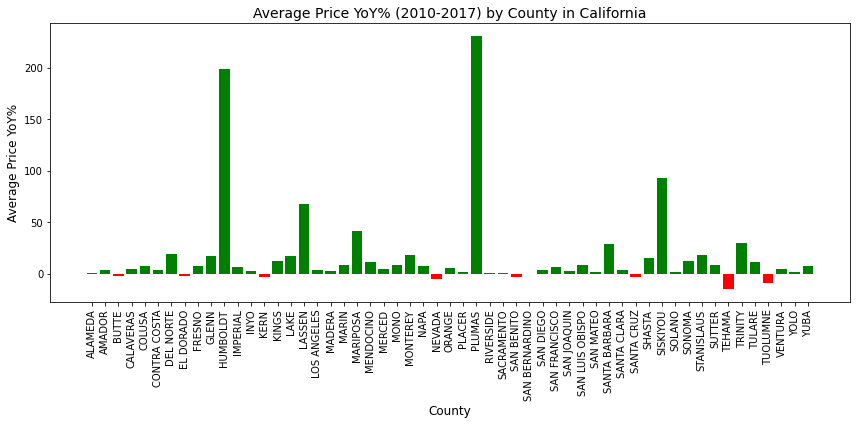

In [11]:
# BAR CHART OF HOUSE PRICE YEAR-OVER-YEAR GROWTH BY COUNTY

# Calculate the average Price_YoY% for all counties (across all regions) from 2010 to 2017
avg_price_yoy_all = re_cleaned_california_aggregated.groupby('COUNTY')['Price_YoY%'].mean()

# Create the bar chart with custom coloring based on Price_YoY%
plt.figure(figsize=(12, 6))
bars = plt.bar(avg_price_yoy_all.index, avg_price_yoy_all.values, color=['green' if x > 0 else 'red' for x in 
                                                                         avg_price_yoy_all])

# Title and labels
plt.title('Average Price YoY% (2010-2017) by County in California', fontsize=14)
plt.xlabel('County', fontsize=12)
plt.ylabel('Average Price YoY%', fontsize=12)
plt.xticks(rotation=90)

# Display the plot
plt.tight_layout()
plt.show()

Out of the 58 counties in California only eight of them had an average yearly house price growth that was negative from 2010 to 2017, Tehama and Tuolumne being the counties with the greatest negative growth at about 15% and 10% less growth than a no-growth county, respectively. Furthermore, counties with negative house price growth weren't large in magnitude, typically ranging from 1% to 5% in absolute value. Only two counties, Plumas and Humboldt, had significantly greater growth at about 230% and 200%, respectively. Another two, Siskiyou and Lassen, had moderately greater growth at approximately 80% and 65%. Also, the majority of counties (50 out of 58 counties) varied between 0% to 20% in house price growth, indicating that from 2010 to 2017, the greater majority of California counties experienced relatively moderate positive growth in their local economies, potentially due to higher consumption, investment, and job opportunities.

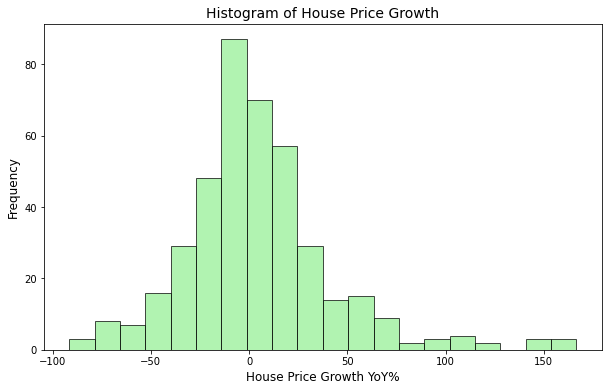

In [40]:
# HISTOGRAM OF HOUSE PRICE YEAR-OVER-YEAR GROWTH (Y-VARIABLE)

from scipy import stats

# Remove outliers beyond 2 standard deviations
mean_price_yoy = re_cleaned_california_aggregated['Price_YoY%'].mean()
std_dev_price_yoy = re_cleaned_california_aggregated['Price_YoY%'].std()

filtered = re_cleaned_california_aggregated[(re_cleaned_california_aggregated['Price_YoY%'] >= mean_price_yoy - 2 *
                                             std_dev_price_yoy) &
                                            (re_cleaned_california_aggregated['Price_YoY%'] <= mean_price_yoy + 2 *
                                             std_dev_price_yoy)]

plt.figure(figsize=(10, 6))

n, bins, patches = plt.hist(filtered['Price_YoY%'], bins=20, color='lightgreen', edgecolor='black', alpha=0.7)

# Title and labels
plt.title('Histogram of House Price Growth', fontsize=14)
plt.xlabel('House Price Growth YoY%', fontsize=12)
plt.ylabel('Frequency', fontsize=12)

# Display the plot
plt.show()

When looking at house price growth for each county year it's clear that house price growth typically ranges between -25% to 25%. There's a slight right skew indicating that there's more county years with positive growth, some having extraordinary growth, over 150%. Surprisingly, some county years have large negative growth that the bar chart could not capture, indicating that some counties do see large negative growth in some years but are outweighed by the even larger positive growth in other years, such that when averaged across 2010 to 2017 the house price growth is positive. The largest negative growth was almost 100% indicating that some county years saw a dramatic decline in house prices, which could potentially be due to the repercussions from the 2008 financial crises.

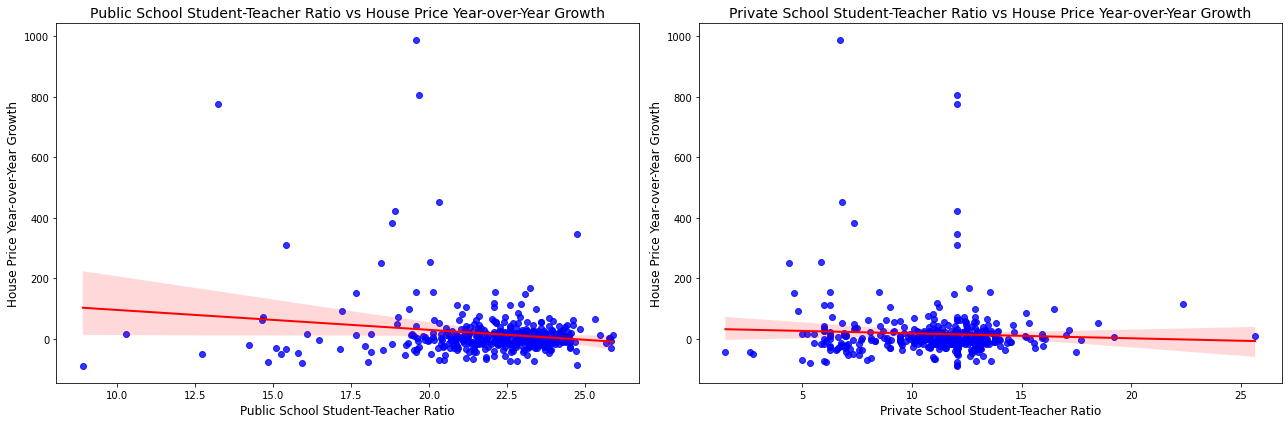

In [14]:
# SCATTERPLOT OF STUDENT-TO-TEACHER RATIO ON HOUSE PRICE YEAR-OVER-YEAR GROWTH

# Create subplots (2 plots side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 6))

# First plot: Public School Student-Teacher Ratio vs House Price Year-over-Year Growth
sns.regplot(x=re_cleaned_california_aggregated['Pub_ST_Ratio'], 
            y=re_cleaned_california_aggregated['Price_YoY%'], 
            scatter_kws={'color': 'b'}, line_kws={'color': 'r', 'linewidth': 2}, ax=axes[0])

axes[0].set_title('Public School Student-Teacher Ratio vs House Price Year-over-Year Growth', fontsize=14)
axes[0].set_xlabel('Public School Student-Teacher Ratio', fontsize=12)
axes[0].set_ylabel('House Price Year-over-Year Growth', fontsize=12)

# Second plot: Private School Student-Teacher Ratio vs House Price Year-over-Year Growth
sns.regplot(x=re_cleaned_california_aggregated['Priv_ST_Ratio'], 
            y=re_cleaned_california_aggregated['Price_YoY%'], 
            scatter_kws={'color': 'b'}, line_kws={'color': 'r', 'linewidth': 2}, ax=axes[1])

axes[1].set_title('Private School Student-Teacher Ratio vs House Price Year-over-Year Growth', fontsize=14)
axes[1].set_xlabel('Private School Student-Teacher Ratio', fontsize=12)
axes[1].set_ylabel('House Price Year-over-Year Growth', fontsize=12)

# Adjust layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()

Public school student-to-teacher ratio has a more significant relationship with house price appreciation than private schools, indicated by the steeper red trend line for public schools compared to the almost flat line for private schools. In line with the histograms most county years house price growth is between -25% to 25%, with the majority of county years having a public school and private school student-to-teacher ratio between 21 to 25 and 9 to 12, respectively.

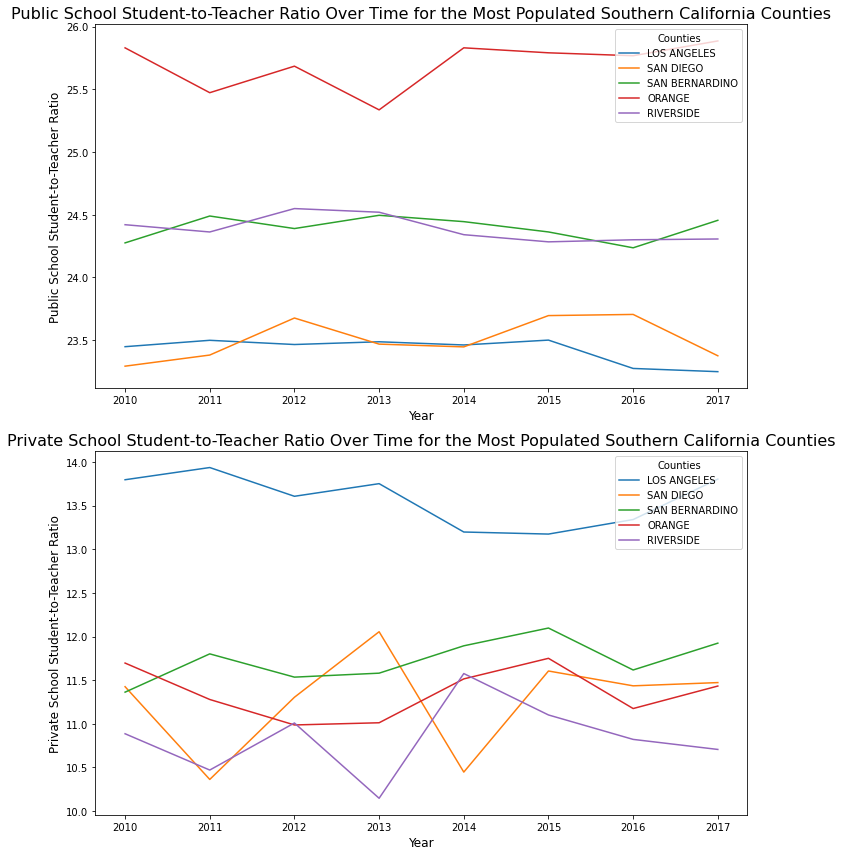

In [25]:
# Filter data for the selected counties
selected_counties = ['LOS ANGELES', 'SAN DIEGO', 'SAN BERNARDINO', 'ORANGE', 'RIVERSIDE']
filtered_county = re_cleaned_california_aggregated[re_cleaned_california_aggregated['COUNTY'].
                                                   isin(selected_counties)]

# Create subplots (3 plots side by side)
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot 1: Public School Student-to-Teacher Ratio
for county in selected_counties:
    county_data = filtered_county[filtered_county['COUNTY'] == county]
    axes[0].plot(county_data['DATE'], county_data['Pub_ST_Ratio'], label=county)

axes[0].set_title(
    'Public School Student-to-Teacher Ratio Over Time for the Most Populated Southern California Counties', 
    fontsize=16)
axes[0].set_xlabel('Year', fontsize=12)
axes[0].set_ylabel('Public School Student-to-Teacher Ratio', fontsize=12)
axes[0].legend(title='Counties')

# Plot 2: Private School Student-to-Teacher Ratio
for county in selected_counties:
    county_data = filtered_county[filtered_county['COUNTY'] == county]
    axes[1].plot(county_data['DATE'], county_data['Priv_ST_Ratio'], label=county)

axes[1].set_title(
    'Private School Student-to-Teacher Ratio Over Time for the Most Populated Southern California Counties', 
    fontsize=16)
axes[1].set_xlabel('Year', fontsize=12)
axes[1].set_ylabel('Private School Student-to-Teacher Ratio', fontsize=12)
axes[1].legend(title='Counties')

# Adjust layout for better spacing between plots
plt.tight_layout()

# Show the plot
plt.show()

Public schools in the most popualted southern California counties don't see much change over time in student-to-teacher ratio, typically staying within a vary narrow band and not even changing one student more or less per teacher from 2010 to 2017. Where as in private schools the change over time is slightly more varied as can be seen with San Diego, which varies within one student more or less of 11 students per teacher, which is a relatively high variation for private schools. 

<span style="font-size:24px; font-weight:bold;">Project 2</span>

<span style="font-size:16px; font-weight:bold;">The Message</span>

Comparing the relationship between private and public school student-to-teacher ratio on yearly house price growth across California counties to see if there is a meaningful relationship. Further examining this relationship across regions within California to check if there are any geographical effects due to policies, economy, culture, and climate.

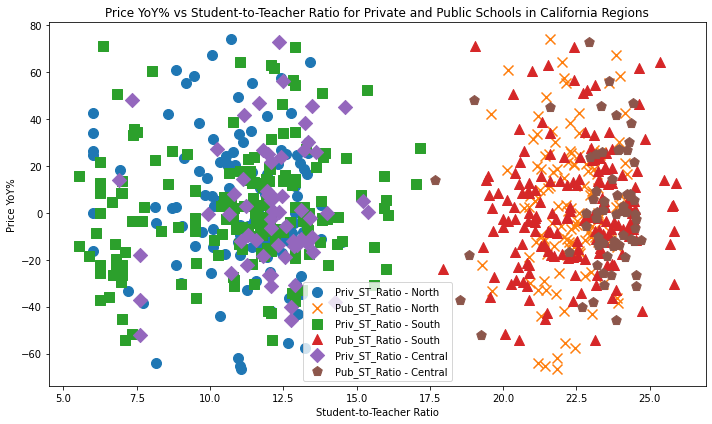

In [16]:
# Removing outliers based on the IQR (Interquartile Range) for Price YoY% and Student-to-Teacher Ratios
Q1_price = re_cleaned_california_aggregated['Price_YoY%'].quantile(0.25)
Q3_price = re_cleaned_california_aggregated['Price_YoY%'].quantile(0.75)
IQR_price = Q3_price - Q1_price

Q1_priv = re_cleaned_california_aggregated['Priv_ST_Ratio'].quantile(0.25)
Q3_priv = re_cleaned_california_aggregated['Priv_ST_Ratio'].quantile(0.75)
IQR_priv = Q3_priv - Q1_priv

Q1_pub = re_cleaned_california_aggregated['Pub_ST_Ratio'].quantile(0.25)
Q3_pub = re_cleaned_california_aggregated['Pub_ST_Ratio'].quantile(0.75)
IQR_pub = Q3_pub - Q1_pub

# Define the bounds for each variable to remove outliers
lower_bound_price = Q1_price - 1.5 * IQR_price
upper_bound_price = Q3_price + 1.5 * IQR_price

lower_bound_priv = Q1_priv - 1.5 * IQR_priv
upper_bound_priv = Q3_priv + 1.5 * IQR_priv

lower_bound_pub = Q1_pub - 1.5 * IQR_pub
upper_bound_pub = Q3_pub + 1.5 * IQR_pub

# Filter the data to remove outliers
re_cleaned_california_aggregated_filtered = re_cleaned_california_aggregated[
    (re_cleaned_california_aggregated['Price_YoY%'] >= lower_bound_price) & 
    (re_cleaned_california_aggregated['Price_YoY%'] <= upper_bound_price) &
    (re_cleaned_california_aggregated['Priv_ST_Ratio'] >= lower_bound_priv) & 
    (re_cleaned_california_aggregated['Priv_ST_Ratio'] <= upper_bound_priv) &
    (re_cleaned_california_aggregated['Pub_ST_Ratio'] >= lower_bound_pub) & 
    (re_cleaned_california_aggregated['Pub_ST_Ratio'] <= upper_bound_pub)
]

# Re-initialize the regions list
regions = ['North', 'South', 'Central']

# Re-initialize markers and labels
markers = ['o', 'x', 's', '^', 'D', 'p']

labels = []

# Scatter plot after removing outliers
fig, ax = plt.subplots(figsize=(10, 6))

for idx, region in enumerate(regions):
    region_data = re_cleaned_california_aggregated_filtered[re_cleaned_california_aggregated_filtered['Region'] \
                                                            == region]
    
    # Scatter plot for Private School Student-to-Teacher Ratio
    ax.scatter(region_data['Priv_ST_Ratio'], region_data['Price_YoY%'], 
               label=f'Priv_ST_Ratio - {region}', marker=markers[2*idx], s=100)
    
    # Scatter plot for Public School Student-to-Teacher Ratio
    ax.scatter(region_data['Pub_ST_Ratio'], region_data['Price_YoY%'], 
               label=f'Pub_ST_Ratio - {region}', marker=markers[2*idx + 1], s=100)

# Adding labels and title
ax.set_xlabel('Student-to-Teacher Ratio')
ax.set_ylabel('Price YoY%')
ax.set_title('Price YoY% vs Student-to-Teacher Ratio for Private and Public Schools in California Regions')

# Display legend
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

<span style="font-size:16px; font-weight:bold;">Maps and Interpretations</span>

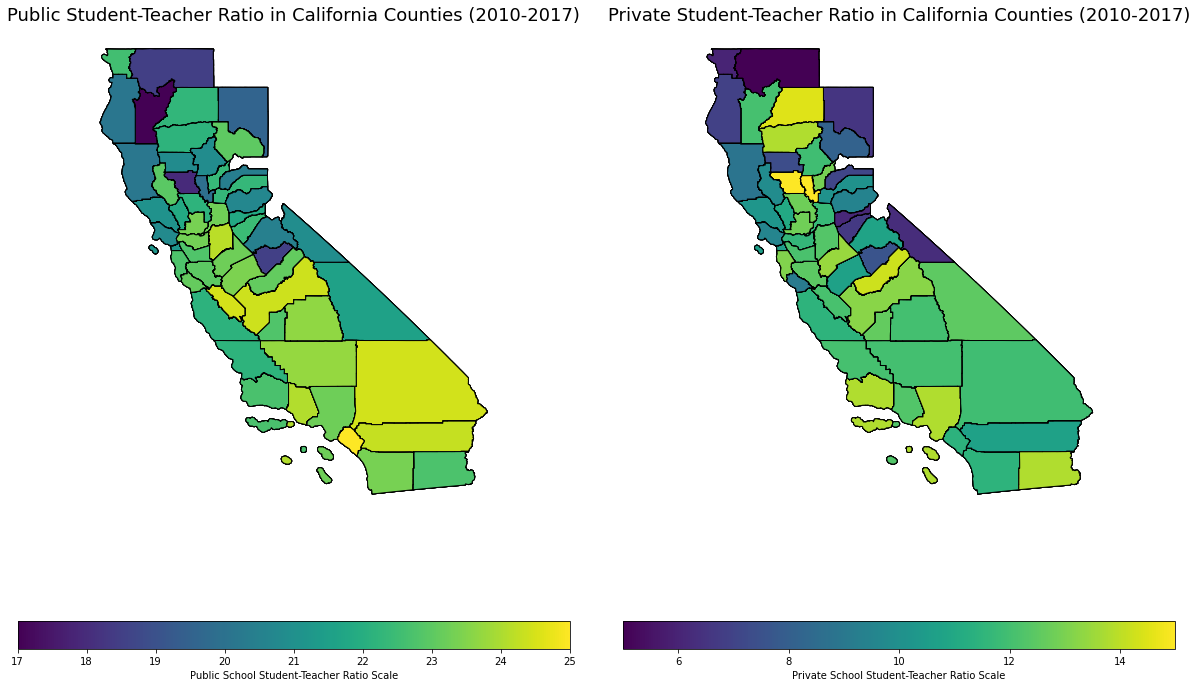

In [17]:
# MAP VISUALIZATION 1: CHOROPLETH MAP OF STUDENT-TO-TEACHER RATIO

import geopandas as gpd
from shapely.geometry import Point

shapefile_path = "/Users/capi/Downloads/tl_2017_us_county/tl_2017_us_county.shp"
california_counties = gpd.read_file(shapefile_path)

# Filter the counties for California (based on the 'NAME' column, which contains county names)
california_counties = california_counties[california_counties['STATEFP'] == '06']

# Ensure the geometry is valid and we can plot
california_counties = california_counties.explode(ignore_index=True)

# Standardize county names to uppercase for merging
california_counties['NAME'] = california_counties['NAME'].str.upper() 
california_counties = california_counties.rename(columns={'NAME': 'COUNTY'})

# First map: Merge on the county column for Pub_ST_Ratio
merged_gdf_1 = california_counties.merge(re_cleaned_california_aggregated[['COUNTY', 'Pub_ST_Ratio']], 
                                         on='COUNTY', how='left')

# Remove any rows with invalid geometries or NaN values in 'Priv_ST_Ratio'
merged_gdf_1 = merged_gdf_1[merged_gdf_1.is_valid]
merged_gdf_1 = merged_gdf_1.dropna(subset=['Pub_ST_Ratio'])

# Second map: Merge on the county column for Priv_ST_Ratio
merged_gdf_2 = california_counties.merge(re_cleaned_california_aggregated[['COUNTY', 'Priv_ST_Ratio']], 
                                         on='COUNTY', how='left')

# Remove any rows with invalid geometries or NaN values in 'Priv_ST_Ratio'
merged_gdf_2 = merged_gdf_2[merged_gdf_2.is_valid]
merged_gdf_2 = merged_gdf_2.dropna(subset=['Priv_ST_Ratio'])

# Create subplots (2 maps side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# First map: Pub_ST_Ratio vs. Price_YoY%
ax1 = axes[0]

# Set up a colormap for the 'Pub_ST_Ratio' with a clipped range
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=17, vmax=25)  # Clip the range for better visualization

# Plot counties with color based on 'Pub_ST_Ratio'
merged_gdf_1.plot(column='Pub_ST_Ratio', ax=ax1, legend=True,
                  legend_kwds={'label': "Public School Student-Teacher Ratio Scale",
                               'orientation': "horizontal", 'shrink': 0.8},
                  cmap=cmap, norm=norm, edgecolor='black', linewidth=1.0)

# Set title and labels for the first map
ax1.set_title('Public Student-Teacher Ratio in California Counties (2010-2017)', fontsize=18)
ax1.set_xlabel('Longitude', fontsize=12)
ax1.set_ylabel('Latitude', fontsize=12)

# Second map: Priv_ST_Ratio
ax2 = axes[1]

# Normalize the data for better color distribution
norm = plt.Normalize(vmin=5, vmax=15) 

# Plot counties with color based on 'Pub_ST_Ratio'
merged_gdf_2.plot(column='Priv_ST_Ratio', ax=ax2, legend=True,
                  legend_kwds={'label': "Private School Student-Teacher Ratio Scale",
                               'orientation': "horizontal", 'shrink': 0.8},
                  cmap=cmap, edgecolor='black', linewidth=1.0, norm=norm)

# Set title and labels for the second map
ax2.set_title('Private Student-Teacher Ratio in California Counties (2010-2017)', fontsize=18)
ax2.set_xlabel('Longitude', fontsize=12)
ax2.set_ylabel('Latitude', fontsize=12)

# Remove both x and y axis labels and ticks for both maps
for ax in axes:
    ax.set_axis_off()

# Remove the black border box around the state
fig.tight_layout(pad=0.01)

# Show the plot
plt.show()

Public school student-to-teacher ratio is typically higher in southern counties, particularly in-land counites are greater than border counties (coastal and on state border). Central counties have slightly more variation and a lower ratio on average, where again in-land counties have a slightly lower ratio. Northern counties have an even lower ratio, however there is no pattern seen between in-land and bordring counties. Private schools have a similar trend, just with less variation in student-to-teacher ratio among the southern counties, and more variation across the northern counties. This could be due to that private school student-to-teacher ratio has a much smaller range than public schools, allowing more for the possibility that neighbouring counties differ substantially in ratio.

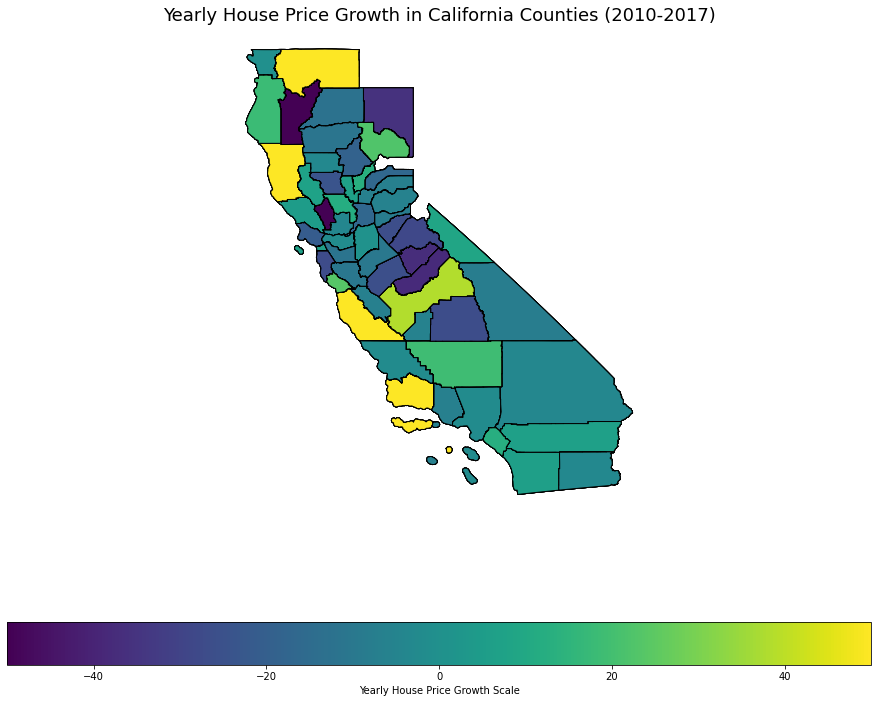

In [18]:
# MAP VISUALIZATION 2: CHOROPLETH MAP OF HOUSE PRICE GROWTH

# Filter the counties for California (based on the 'NAME' column, which contains county names)
california_counties = california_counties[california_counties['STATEFP'] == '06']  

# Ensure the geometry is valid and we can plot
california_counties = california_counties.explode(ignore_index=True)

# Merge on the county column
merged_gdf = california_counties.merge(re_cleaned_california_aggregated[['COUNTY', 'Price_YoY%']], on='COUNTY', 
                                       how='left')

# Remove any rows with invalid geometries or NaN values in 'Priv_ST_Ratio'
merged_gdf = merged_gdf[merged_gdf.is_valid]
merged_gdf = merged_gdf.dropna(subset=['Price_YoY%'])

# Plot the map
fig, ax = plt.subplots(1, 1, figsize=(15, 10))

# Set up a colormap for the 'Priv_ST_Ratio' with a clipped range from 5 to 15
cmap = plt.cm.viridis
norm = plt.Normalize(vmin=-50, vmax=50)  # Clip the range to 5-15 for better visualization

# Plot counties with color based on 'Priv_ST_Ratio'
merged_gdf.plot(column='Price_YoY%', ax=ax, legend=True,
                legend_kwds={'label': "Yearly House Price Growth Scale",
                             'orientation': "horizontal", 'shrink': 0.8},
                cmap=cmap, norm=norm, edgecolor='black', linewidth=1.0)

# Set the title and labels
ax.set_title('Yearly House Price Growth in California Counties (2010-2017)', fontsize=18)
ax.set_xlabel('Longitude', fontsize=12)
ax.set_ylabel('Latitude', fontsize=12)

# Remove both x and y axis labels and ticks
ax.set_axis_off()

# Remove the black border box around the state
fig.tight_layout(pad=0.01)

# Show the plot
plt.show()

Coastal counties tend to have the highest house price growth, some reaching over 40% in year-over-year growth, while in-land central and northern counties have the lowest growth, and alot of them actually see negative growth, some regressing more than 40% in year-over-year growth. This could be due to coastal counties having beachside properties, or even just properties with a view of the ocean, which could potentially be associated with greater demand than properties that do not (in-land county properties). Also, these counties may have favourable property tax policies, housing policies, and climate compared to in-land counties, further increasing the demand for houses and driving up house price growth. Southern in-land counties have around zero growth, plus or minus 10%, but is still greater than the negative growth of in-land central and northern counties. This may just be due to there being more central and north counties allowing for a greater possibility of counties having negative growth.

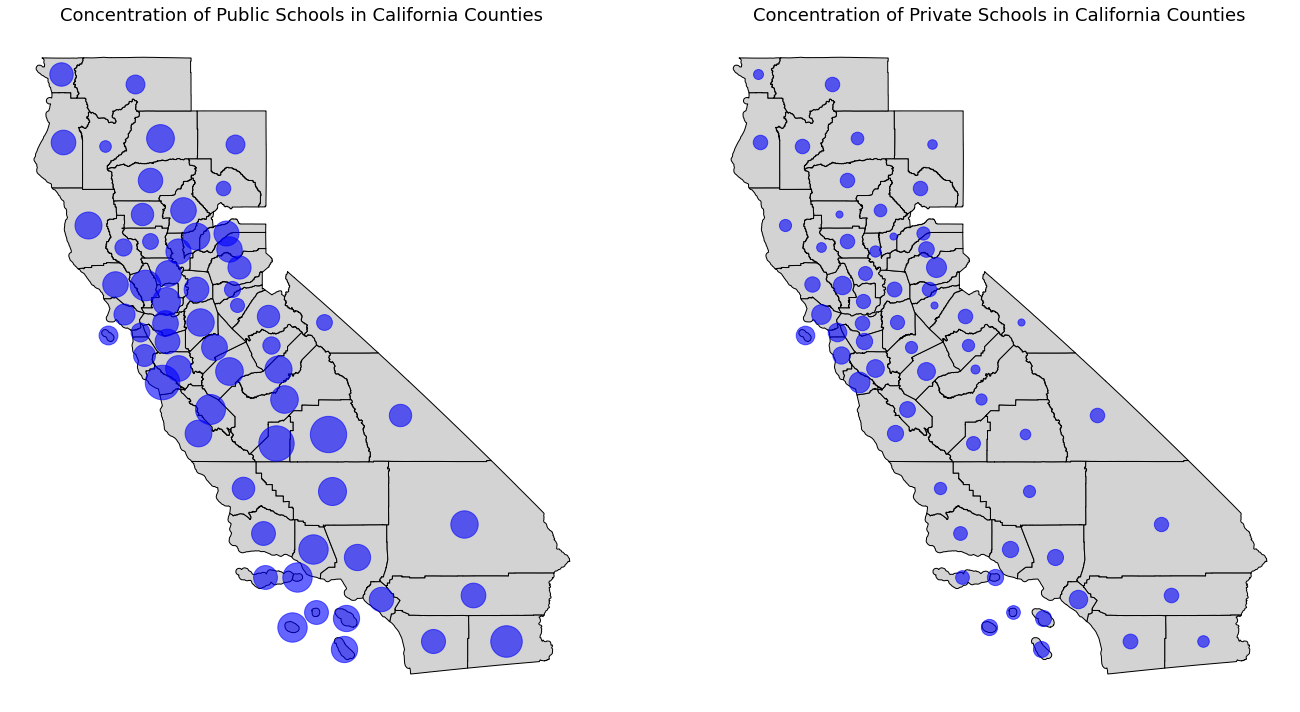

In [19]:
# MAP VISUALIZATION 3: SYMBOL MAP OF STUDENT-TO-TEACHER RATIO

# Filter for California counties
california_counties = california_counties[california_counties['STATEFP'] == '06']

# Group by county and get the count of public schools
county_pub_count = re_cleaned_california_aggregated.groupby('COUNTY')['Pub_Count'].max().reset_index()

# Merge the aggregated data with the geographical data for public schools
merged_gdf_pub = california_counties.merge(county_pub_count, on='COUNTY', how='left')

# Remove rows with missing Pub_Count
merged_gdf_pub = merged_gdf_pub.dropna(subset=['Pub_Count'])

# Group by county and get the count of private schools
county_priv_count = re_cleaned_california_aggregated.groupby('COUNTY')['Priv_Count'].max().reset_index()

# Merge the aggregated data with the geographical data for private schools
merged_gdf_priv = california_counties.merge(county_priv_count, on='COUNTY', how='left')

# Remove rows with missing Priv_Count
merged_gdf_priv = merged_gdf_priv.dropna(subset=['Priv_Count'])

# Plot the maps side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 10))

# Plot the map for public schools
merged_gdf_pub.plot(ax=ax1, color='lightgrey', edgecolor='black')
for idx, row in merged_gdf_pub.iterrows():
    size = row['Pub_Count'] * 50  
    ax1.scatter(row['geometry'].centroid.x, row['geometry'].centroid.y, s=size, color='blue', alpha=0.6)

ax1.set_title('Concentration of Public Schools in California Counties', fontsize=18)
ax1.set_axis_off()

# Plot the map for private schools
merged_gdf_priv.plot(ax=ax2, color='lightgrey', edgecolor='black')
for idx, row in merged_gdf_priv.iterrows():
    size = row['Priv_Count'] * 50  
    ax2.scatter(row['geometry'].centroid.x, row['geometry'].centroid.y, s=size, color='blue', alpha=0.6)

ax2.set_title('Concentration of Private Schools in California Counties', fontsize=18)
ax2.set_axis_off()

# Show the plot
plt.tight_layout()
plt.show()

Almost across every county there are significantly more public schools than private schools, largely due to public schools being more accessible and funded by taxpayers, where as private schools being funded through tuition fees and having a more selective admission process. Across all counties the number of public and private schools doesn't vary significantly, however northern counties tend to have slightly less public schools. There is also slightly more variation in the number of public and private schools in northern and central counties compared to southern counties, but it is not significant. This could be due to southern counties having more urban areas and a greater population, resulting in there having to be more schools. 

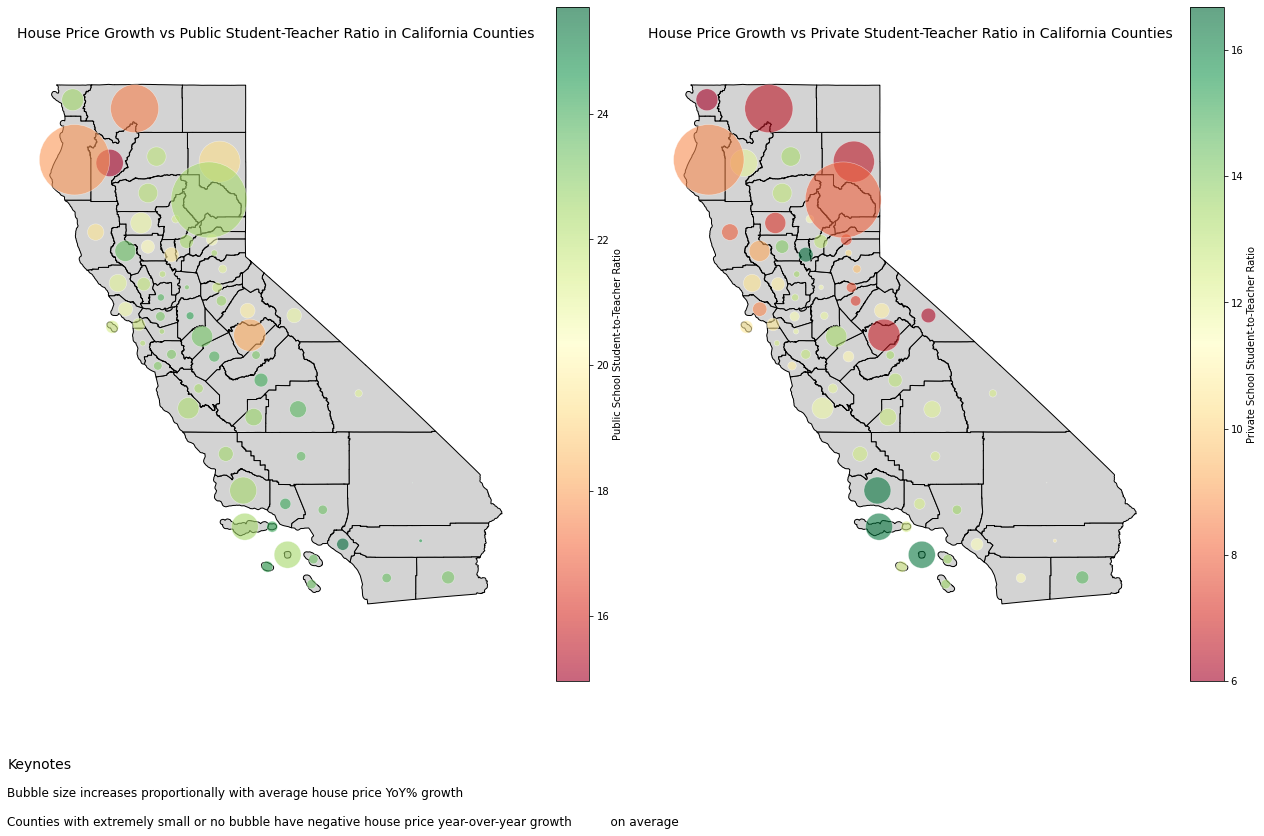

In [20]:
# MAP VISUALIZATION 4: BUBBLE MAP OF STUDENT-TO-TEACHER RATIO ON HOUSE PRICE GROWTH

# First map: Average Priv_ST_Ratio and Price_YoY% for each county
county_avg_1 = re_cleaned_california_aggregated.groupby('COUNTY').agg(
    avg_Pub_ST_Ratio=('Pub_ST_Ratio', 'mean'),
    avg_Price_YoY_percent=('Price_YoY%', 'mean')
).reset_index()

# Second map: Average Pub_ST_Ratio for each county
county_avg_2 = re_cleaned_california_aggregated.groupby('COUNTY').agg(
    avg_Priv_ST_Ratio=('Priv_ST_Ratio', 'mean'),
    avg_Price_YoY_percent=('Price_YoY%', 'mean')
).reset_index()

# Merge the calculated averages with the california_counties
california_counties_1 = california_counties.merge(county_avg_1, left_on='COUNTY', right_on='COUNTY', how='left', 
                                                  suffixes=('_geo', '_avg1'))
california_counties_2 = california_counties.merge(county_avg_2, left_on='COUNTY', right_on='COUNTY', how='left', 
                                                  suffixes=('_geo', '_avg2'))

# Reproject the geometries to a projected CRS 
california_counties_1 = california_counties_1.to_crs(epsg=3395)  
california_counties_2 = california_counties_2.to_crs(epsg=3395)

# Create subplots (2 maps side by side)
fig, axes = plt.subplots(1, 2, figsize=(18, 10))

# First map: Priv_ST_Ratio vs. Price_YoY%
ax1 = axes[0]
california_counties_1.plot(ax=ax1, color='lightgrey', edgecolor='black', linewidth=1)

size_normalized_1 = np.interp(california_counties_1['avg_Pub_ST_Ratio'], 
                              (california_counties_1['avg_Pub_ST_Ratio'].min(), 
                               california_counties_1['avg_Pub_ST_Ratio'].max()), 
                              (50, 1000)) 

scatter1 = ax1.scatter(
    california_counties_1.geometry.centroid.x, 
    california_counties_1.geometry.centroid.y,
    s=abs(california_counties_1['avg_Price_YoY_percent'])*25,  # Bubble size based on avg_Price_YoY_percent
    c=california_counties_1['avg_Pub_ST_Ratio'],  # Color by avg_Priv_ST_Ratio
    cmap='RdYlGn',  
    alpha=0.6, 
    edgecolors="w",
    linewidth=0.5
)

fig.colorbar(scatter1, ax=ax1, label="Public School Student-to-Teacher Ratio")
ax1.set_title('House Price Growth vs Public Student-Teacher Ratio in California Counties', fontsize=14, pad=20)

# Second map: Pub_ST_Ratio
ax2 = axes[1]
california_counties_2.plot(ax=ax2, color='lightgrey', edgecolor='black', linewidth=1)

size_normalized_2 = np.interp(california_counties_2['avg_Priv_ST_Ratio'], 
                              (california_counties_2['avg_Priv_ST_Ratio'].min(), 
                               california_counties_2['avg_Priv_ST_Ratio'].max()), 
                              (50, 1000))  # Adjust size range

scatter2 = ax2.scatter(
    california_counties_2.geometry.centroid.x, 
    california_counties_2.geometry.centroid.y,
    s=abs(california_counties_2['avg_Price_YoY_percent'])*25,  # Bubble size based on avg_Price_YoY_percent
    c=california_counties_2['avg_Priv_ST_Ratio'],  # Color by avg_Pub_ST_Ratio
    cmap='RdYlGn',  
    alpha=0.6, 
    edgecolors="w",
    linewidth=0.5,
)

fig.colorbar(scatter2, ax=ax2, label="Private School Student-to-Teacher Ratio")
ax2.set_title('House Price Growth vs Private Student-Teacher Ratio in California Counties', fontsize=14, pad=20)

# Add "Keynotes" and other explanations
fig.text(0.0, -0.08, 'Keynotes', ha='left', va='center', fontsize=14)
fig.text(0.0, -0.12, 'Bubble size increases proportionally with average house price YoY% growth', ha='left', 
         va='center', fontsize=12)
fig.text(0.0, -0.16, 'Counties with extremely small or no bubble have negative house price year-over-year growth \
         on average', ha='left', va='center', fontsize=12)

# Remove axis labels and ticks for both maps
for ax in axes:
    ax.set_axis_off()

# Remove the black border box around the state
fig.tight_layout(pad=2.0)

# Show the plot
plt.show()

Going from south east to north west California counties, both private and public school student-to-teacher ratio tends to decrease (especially private schools), while house price growth increases. Southern counties, especially in-land ones, have very low and even negative house price growth while also having some of the highest public and private school student-to-teacher ratios, around 22 to 26 and 12 to 16 students-per-teacher respectively. Though northern counties see more variation among ratios, they tend to have some of the greatest year-over-year house price growth. While central counties see a mix of both ratios and house price growth. This may be an indication of school quality being better in northern counties resulting in greater demand for properties there, hence driving up house prices. Some of these northern counties may also have less urban areas, hence more spacious lots, something that high income individuals may be looking for after working in the city for awhile, especially if they're looking to settle down and raise a family. Furthermore, these counties may have favourable property polices (i.e. lower property taxes), and a more affordable cost of living (i.e. lower house, grocery, and transportation costs).

<span style="font-size:16px; font-weight:bold;">Regressions</span>

In [36]:
# REGRESSION SUMMARY TABLE 1

import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col
from stargazer.stargazer import Stargazer
from IPython.core.display import HTML

# Create interaction terms
re_cleaned_california_aggregated['Priv_Pub_ST_Ratio'] = re_cleaned_california_aggregated['Priv_ST_Ratio'] \
                                                      * re_cleaned_california_aggregated['Pub_ST_Ratio']
    
re_cleaned_california_aggregated['Priv_Pub_ER'] = re_cleaned_california_aggregated['Priv_ER'] \
                                                * re_cleaned_california_aggregated['Pub_ER']
    
re_cleaned_california_aggregated['Priv_Pub_Avg_GR_Span'] = re_cleaned_california_aggregated['Priv_Avg_GR_Span'] \
                                                         * re_cleaned_california_aggregated['Pub_Avg_GR_Span']

re_cleaned_california_aggregated['const'] = 1

# Create lists of variables to be used in each regression, now including interaction terms
X1 = ['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio']
X2 = ['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio', 'Priv_ER', 'Pub_ER']
X3 = ['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio', 'Priv_ER', 'Pub_ER', 'Priv_Avg_GR_Span', 'Pub_Avg_GR_Span']
X4 = ['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio', 'Priv_ER', 'Pub_ER', 'Priv_Avg_GR_Span', 'Pub_Avg_GR_Span',
      'Priv_Pub_ST_Ratio']
X5 = ['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio', 'Priv_ER', 'Pub_ER', 'Priv_Avg_GR_Span', 'Pub_Avg_GR_Span',
      'Priv_Pub_ST_Ratio', 'Priv_Pub_ER']
X6 = ['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio', 'Priv_ER', 'Pub_ER', 'Priv_Avg_GR_Span', 'Pub_Avg_GR_Span', 
      'Priv_Pub_ST_Ratio', 'Priv_Pub_ER', 'Priv_Pub_Avg_GR_Span']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(re_cleaned_california_aggregated['Price_YoY%'], re_cleaned_california_aggregated[X1], 
              missing='drop').fit()
reg2 = sm.OLS(re_cleaned_california_aggregated['Price_YoY%'], re_cleaned_california_aggregated[X2], 
              missing='drop').fit()
reg3 = sm.OLS(re_cleaned_california_aggregated['Price_YoY%'], re_cleaned_california_aggregated[X3], 
              missing='drop').fit()
reg4 = sm.OLS(re_cleaned_california_aggregated['Price_YoY%'], re_cleaned_california_aggregated[X4], 
              missing='drop').fit()
reg5 = sm.OLS(re_cleaned_california_aggregated['Price_YoY%'], re_cleaned_california_aggregated[X5], 
              missing='drop').fit()
reg6 = sm.OLS(re_cleaned_california_aggregated['Price_YoY%'], re_cleaned_california_aggregated[X6], 
              missing='drop').fit()

# Prepare a summary table with R-squared and number of observations
info_dict = {
    'R-squared': lambda x: f"{x.rsquared:.2f}",
    'No. observations': lambda x: f"{int(x.nobs)}"
}

# Create a summary table using summary_col
results_table = summary_col(results=[reg1, reg2, reg3, reg4, reg5, reg6],
                           float_format='%0.2f',
                           stars=True,
                           model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'],
                           info_dict=info_dict,
                           regressor_order=['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio', 'Priv_ER', 'Pub_ER', 
                                           'Priv_Pub_ST_Ratio', 'Priv_Pub_ER', 'Priv_Pub_Avg_GR_Span'])

# Create a formatted table with Stargazer
stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6])

# Display the table in HTML format
HTML(stargazer.render_html())

Public school student-to-teacher ratio is significant in model one at the 1% level, and in two and three at the 5% level. In model three, after controlling for enrollment rate and average grade span in public and prviate schools as well as private school student-to-teacher ratio, an extra student per teacher is associated with an approximate 12.5 percentage point decrease in house price growth, on average. However, after controlling for interactive terms between public and private school quality measures, public school student-to-teacher ratio no longer becomes significant. This may mean that public school student-to-teacher ratio was capturing the combined effect of private and public school quality on house price growth. But when controlled for, the combined effect isn't even significant, possibly due to the unimportance of private school student-to-teacher ratio.

In model six when controlling for all school quality measures and interactive terms, both private and public average grade span were significant at the 5% level, with estimates quite extreme in magnitude. On average, for an additional grade offered by a public and private school there's an approximate 82.5 and 22.1 percentage point decrease in house price growth, respectively. This is a massive decrease in house price, possibly caused by multicollinearity between public and private school average grade span and other school quality variables, or multicollinearity of school quality variables with the combined effect added. The inclusion of the combined effect of private and public school average grade span could also be causing there to be too many variables, leading to extreme estimates. 

However, the combined effect of private and public school average grade span on house price growth is significant at the 10% level. This may indicate that an additional grade offered by schools is associated with an approximate 8.5 percentage point increase in house price growth, on average. This could indicate that having more grades offered is beneficial for school quality as students become more familiar with the teachers, students and school policies, resulting in local house prices increasing. 

All other school quality variables and interactive terms were insignificant, indicating that enrollment rate isn't a good measure of school quality possibly due to enrollment rates generally being quite high for both public and private schools (above 90%) as seen in the summary table results. Average grade span for public and private schools was also not signifcant in any of the models up until model six, possibly due to differences in grade span offered being quite small across schools, and so an additional grade offered won't make much of an impact.

In [35]:
# REGRESSION SUMMARY TABLE 2

# Create dummy variables for the regions
region_dummies = pd.get_dummies(re_cleaned_california_aggregated['Region'], drop_first=True)
re_cleaned_california_aggregated = pd.concat([re_cleaned_california_aggregated, region_dummies], axis=1)

# Remove duplicate region columns if they exist
re_cleaned_california_aggregated = re_cleaned_california_aggregated.loc[:, ~re_cleaned_california_aggregated. \
                                                                        columns.duplicated()]

# Convert boolean region columns to numeric (0/1)
re_cleaned_california_aggregated['North'] = re_cleaned_california_aggregated['North'].astype(int)
re_cleaned_california_aggregated['South'] = re_cleaned_california_aggregated['South'].astype(int)
re_cleaned_california_aggregated['Central'] = re_cleaned_california_aggregated['Central'].astype(int)

re_cleaned_california_aggregated['const'] = 1

# Create lists of variables to be used in each regression including regional fixed effects
X1 = ['const', 'Priv_ST_Ratio', 'Incpc_YoY%', 'Pop_YoY%', 'South', 'Central']  
X2 = ['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio', 'Incpc_YoY%', 'Pop_YoY%', 'South', 'Central']
X3 = ['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio', 'Priv_ER', 'Incpc_YoY%', 'Pop_YoY%', 'South', 'Central']
X4 = ['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio', 'Priv_ER', 'Pub_ER', 'Incpc_YoY%', 'Pop_YoY%', 'South', 
      'Central']
X5 = ['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio', 'Priv_ER', 'Pub_ER', 'Priv_Avg_GR_Span', 'Incpc_YoY%', 'Pop_YoY%',
      'South', 'Central']
X6 = ['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio', 'Priv_ER', 'Pub_ER', 'Priv_Avg_GR_Span', 'Pub_Avg_GR_Span', 
      'Incpc_YoY%', 'Pop_YoY%', 'South', 'Central']

# Estimate an OLS regression for each set of variables
reg1 = sm.OLS(re_cleaned_california_aggregated['Price_YoY%'], re_cleaned_california_aggregated[X1], 
              missing='drop').fit()
reg2 = sm.OLS(re_cleaned_california_aggregated['Price_YoY%'], re_cleaned_california_aggregated[X2], 
              missing='drop').fit()
reg3 = sm.OLS(re_cleaned_california_aggregated['Price_YoY%'], re_cleaned_california_aggregated[X3], 
              missing='drop').fit()
reg4 = sm.OLS(re_cleaned_california_aggregated['Price_YoY%'], re_cleaned_california_aggregated[X4], 
              missing='drop').fit()
reg5 = sm.OLS(re_cleaned_california_aggregated['Price_YoY%'], re_cleaned_california_aggregated[X5], 
              missing='drop').fit()
reg6 = sm.OLS(re_cleaned_california_aggregated['Price_YoY%'], re_cleaned_california_aggregated[X6], 
              missing='drop').fit()

# Prepare a summary table with R-squared and number of observations
info_dict = {
    'R-squared': lambda x: f"{x.rsquared:.2f}",
    'No. observations': lambda x: f"{int(x.nobs)}"
}

# Create a summary table using summary_col
results_table = summary_col(results=[reg1, reg2, reg3, reg4, reg5, reg6],
                           float_format='%0.2f',
                           stars=True,
                           model_names=['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model 5', 'Model 6'],
                           info_dict=info_dict,
                           regressor_order=['const', 'Priv_ST_Ratio', 'Pub_ST_Ratio', 'Priv_ER', 'Pub_ER', 
                                            'Incpc_YoY%', 'Pop_YoY%', 'South', 'Central'])

# Create a formatted table with Stargazer
stargazer = Stargazer([reg1, reg2, reg3, reg4, reg5, reg6])

# Display the table in HTML format
HTML(stargazer.render_html())

Across all models public school student-to-teacher ratio is significant, from models two to four at the 1% level and in models five and six at the 5% level. In model six controlling for school qaulity measures in public and private schools, regional fixed effects, income per capita growth, and population growth, for each additional student per teacher in public schools there's an approximate 13.7 percentage point decrease in year-over-year house price growth, on average. Which is about one percentage point more in magnitude than when just controlling for school quality measures seen in regression summary table one model three. Meaning the regional fixed effects, income and population growth were capturing a bit of the positive impact on house prices, making the estimate found in regression summary table one underestimated. These estimates align with my maps and scatter plot, indicating that public school student-to-teacher ratio may indeed be a good measure for school quality and hence have an impact on house prices. Whereas, private school student-to-teacher ratio wasn't significant in any of the models, indicating that it's not as good of a measure for school quality resulting in less of an impact on house prices. This could be due to private school student-to-teacher ratio already being quite small (about half the size of public schools on average), and therefore one extra or less student per teacher won't make as much of an impact on schooling quality, hence no correlation with house price growth.

None of the regional fixed effects were significant indicating that any regional patterns seen in my maps were capturing confounding variable effects on year-over-year house price growth, and endogeniety due to potentially not controlling for county policies, crime, job opportunities, and other economic variables. Hence there being bias and my maps overestimating regional patterns of house price growth. All my other school quality measures (enrollment rate, and average grade span) as well as population growth were never significant. However, income per capita year-over-year growth was significant at the 10% level in models one, four, and five. In model five when controlling for regional fixed effects, population growth, and school quality measures, a one percentage point increase in income per capita year-over-year growth was associated with an approximate 3.4 percentage point decrease in house price year-over-year growth. This is surprising since it's expected that higher income individuals would be buying higher priced houses. However, it may be the case that there's a greater proportion of renters or high income individuals are price sensitive to houses, leading to lower demand resulting in lower house price growth.

<span style="font-size:16px; font-weight:bold;">Conclusion</span>

Public school student-to-teacher ratio was the only consistently significant measure on having an impact on house price growth, where an extra student per teacher was associated with a lower house price. Potentially indicating it to be the only good proxy of school quality in this analysis. A next step would be to reframe the question of this project to compare the relationship between public and private school quality measures on house price growth, and to what extent are these measures capitalized into house prices, particularly public and private education investment as a means to increase the net asset value of high income individuals. This could be interesting because high income individuals have the choice to live in higher quality neighbourhoods with better schooling, and contribute to local school quality through tuition fees, donations, and endowments. Therefore, every dollar invested to increase local school qaulity may increase local house prices, hence increasing those high income individuals net asset value. Performing this analysis would mean creating a dummy variable for low and high income groups, taking the high income group only since they have a choice to live in more affluent neighbourhoods, and therefore only matter in the context of this question, then merging education funding data. Also, bringing in proficiency test scores, school ratings, attendance rate, student growth, and college/career readiness as proxies for public and private school quality could make this analysis more interesting. Furthermore, controlling for crime rate and county policies such as property tax could make the analysis more accurate. 

<span style="font-size:16px; font-weight:bold;">References</span>

1. Oates, W. E. (1969). The Effects of Property Taxes and Local Public Spending on Property Values: An Empirical Study of Tax Capitalization and the Tiebout Hypothesis. Journal of Political Economy, 77(6), 957–971. http://www.jstor.org/stable/1837209

2. Rosen, H. S., & Fullerton, D. J. (1977). A Note on Local Tax Rates, Public Benefit Levels, and Property Values. Journal of Political Economy, 85(2), 433–440. http://www.jstor.org/stable/1830804

3. Downes, T., & Zabel, J. (2002). The impact of school characteristics on house prices: Chicago 1987–1991. jOURNAL OF urban Economics, 52(1), 1-25. https://doi.org/10.1016/S0094-1190(02)00010-4

4. Gibbons, Steve & Machin, Stephen, 2003. "Valuing English primary schools," Journal of Urban Economics, Elsevier, vol. 53(2), pages 197-219. https://doi.org/10.1016/S0094-1190(02)00516-8

5. Figlio, D. N., & Lucas, M. E. (2004). What’s in a Grade? School Report Cards and the Housing Market. The American Economic Review, 94(3), 591–604. http://www.jstor.org/stable/3592944

6. Bayer, P., Ferreira, F., & McMillan, R. (2007). A Unified Framework for Measuring Preferences for Schools and Neighborhoods. Journal of Political Economy, 115(4), 588–638. https://doi.org/10.1086/522381

7. Jud, G. D., & Watts, J. M. (1981). Schools and Housing Values. Land Economics, 57(3), 459–470. https://doi.org/10.2307/3146025

8. Black, S. E. (1999). Do Better Schools Matter? Parental Valuation of Elementary Education. The Quarterly Journal of Economics, 114(2), 577–599. http://www.jstor.org/stable/2587017

9. Kane, T. J., Riegg, S. K., & Staiger, D. O. (2006). School Quality, Neighborhoods, and Housing Prices. American Law and Economics Review, 8(2), 183–212. http://www.jstor.org/stable/42705497

10. Brasington, D. M. (1999). Which Measures of School Quality Does the Housing Market Value? The Journal of Real Estate Research, 18(3), 395–413. http://www.jstor.org/stable/24887199

11. David Brasington & Donald R. Haurin, 2006. "Educational Outcomes and House Values: A Test of the value added Approach," Journal of Regional Science, Wiley Blackwell, vol. 46(2), pages 245-268. https://doi.org/10.1111/j.0022-4146.2006.00440.x

12. Andrew, M. V. D. (2021). US Schools Dataset [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/andrewmvd/us-schools-dataset?select=Public_Schools.csv

13. Sakib, A. S. (2021). USA Real Estate Dataset [Data set]. Kaggle. Retrieved from https://www.kaggle.com/datasets/ahmedshahriarsakib/usa-real-estate-dataset

14. National Center for Education Statistics (NCES). (n.d.). School Expenditure, Salary, and Revenue [Data set]. U.S. Department of Education. Retrieved from
https://nces.ed.gov/ccd/elsi/tableGenerator.aspx

15. U.S. Bureau of Economic Analysis (BEA). (n.d.). Income Per Capita Yearly Growth Data. Retrieved from
https://apps.bea.gov/itable/?ReqID=70&step=1&_gl=1*1v3z13y*_ga*MTAxNDU0OTIxNi4xNzM4ODYzODc1*_ga_J4698JNNFT*MTc0MTQ1NTQ5NS44LjAuMTc0MTQ1NTQ5NS42MC4wLjA.#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyOSwyNSwzMSwyNiwyNywzMF0sImRhdGEiOltbIlRhYmxlSWQiLCIyMCJdLFsiTWFqb3JfQXJlYSIsIjQiXSxbIlN0YXRlIixbIjA2MDAwIl1dLFsiQXJlYSIsWyJYWCJdXSxbIlN0YXRpc3RpYyIsWyIzIl1dLFsiVW5pdF9vZl9tZWFzdXJlIiwiUGVyY2VudENoYW5nZSJdLFsiWWVhciIsWyItMSJdXSxbIlllYXJCZWdpbiIsIi0xIl0sWyJZZWFyX0VuZCIsIi0xIl1dfQ==

16. U.S. Bureau of Economic Analysis (BEA). (n.d.). Population Yearly Growth Data. Retrieved from
https://apps.bea.gov/itable/?ReqID=70&step=1&_gl=1*1v3z13y*_ga*MTAxNDU0OTIxNi4xNzM4ODYzODc1*_ga_J4698JNNFT*MTc0MTQ1NTQ5NS44LjAuMTc0MTQ1NTQ5NS42MC4wLjA.#eyJhcHBpZCI6NzAsInN0ZXBzIjpbMSwyOSwyNSwzMSwyNiwyNywzMF0sImRhdGEiOltbIlRhYmxlSWQiLCIyMCJdLFsiTWFqb3JfQXJlYSIsIjQiXSxbIlN0YXRlIixbIjA2MDAwIl1dLFsiQXJlYSIsWyJYWCJdXSxbIlN0YXRpc3RpYyIsWyIyIl1dLFsiVW5pdF9vZl9tZWFzdXJlIiwiUGVyY2VudENoYW5nZSJdLFsiWWVhciIsWyItMSJdXSxbIlllYXJCZWdpbiIsIi0xIl0sWyJZZWFyX0VuZCIsIi0xIl1dfQ==

17. U.S. Census Bureau [Data set]. Land Area Data. Shapefile Data. Retrieved from
https://data.census.gov/table/GEOINFO2023.GEOINFO?q=GEOINFO&g=040XX00US06$0500000